In [49]:
import pandas as pd
from matplotlib import pyplot as plt

In [276]:
df = pd.read_csv('../data/results_df/important_cols_v45_dna.csv')

In [44]:
data = pd.read_csv('../data/feature_engineering/combined_feng.csv', index_col=0)

In [3]:
df.shape

(11, 1352)

In [277]:
df.sum().sort_values(ascending=False)[df.sum()>0]

most_popular_trademark_class_null    11
last_equity_funding_amount_usd       11
last_funding_month                   11
Number of Funding Rounds             11
number_of_employees                  11
                                     ..
 E-Commerce Platforms                 1
Augmented Reality                     1
 Xin Yu Li Mei                        1
Highland Europe                       1
Angel Investment                      1
Length: 115, dtype: int64

In [278]:
df_sort = pd.DataFrame(df.sum().sort_values(ascending=False)[df.sum()>0])

In [279]:
df_sort[0].value_counts()

1     21
11    17
7     14
2     12
6     11
10     9
9      8
3      6
4      6
5      6
8      5
Name: 0, dtype: int64

In [280]:
# df_sort.to_csv('../data/results_df/important_cols_sort_v45.csv')
# df_sort.to_csv('../data/results_df/important_cols_sort_v45_dna.csv')

803/3000 data does not have info on number of founders and have been labeled as male-led

*how to keep note of the info that is missing?*

In [ ]:
# data[data['Number of Founders']==0]

In [224]:
def plot(col, type='box', null=False):
    '''
    null=False: remove any null values in col (that have been labeled as male-led)
    remember to set null=True for boolean category cols
    '''
    
    # set up
    labels = ['male-led', 'female-led']
    male_filter = (data['female_led']==0)
    female_filter = (data['female_led']==1)
    remove_null_filter = (data[col]!=0)
    
    # get data
    male_df = data[male_filter & remove_null_filter][col]
    female_df = data[female_filter  & remove_null_filter][col]
    male_null = data[male_filter][col]
    female_null = data[female_filter][col]
    
    
    # plot types
    if type=='box': #boxplot
        if null==False:
            plt.boxplot([male_df, female_df], labels=labels);
        else:
            plt.boxplot([male_null, female_null], labels=labels);
    
    
    elif type=='hist': #histogram
        if null==False:
            #plt.hist([male_df, female_df], label=labels);
            
            #sets up the axis and gets histogram data
            colors = ['b', 'm']
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax1.hist([male_df, female_df])
            n, bins, patches = ax1.hist([male_df, female_df])
            ax1.cla() #clear the axis

            #plots the histogram data
            width = (bins[1] - bins[0]) * 0.4
            bins_shifted = bins + width
            ax1.bar(bins[:-1], n[0], width, color=colors[0], label='male-led')
            ax2.bar(bins_shifted[:-1], n[1], width, color=colors[1], label='female-led')

            #finishes the plot
            ax1.tick_params('y')
            ax2.tick_params('y')
            ax1.legend()
            ax2.legend()
            
        else:
            plt.hist([male_null, female_null], label=labels);

    # ???
    if type=='bar':
        male_null.value_counts(normalize=True).plot(kind='bar')
        female_null.value_counts(normalize=True).plot(kind='bar')
    
    # add col name as title
    plt.title(col)

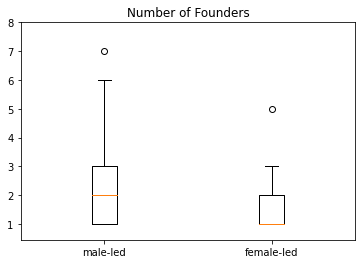

In [129]:
plot('Number of Founders')
plt.axis([None, None, None, 8]);

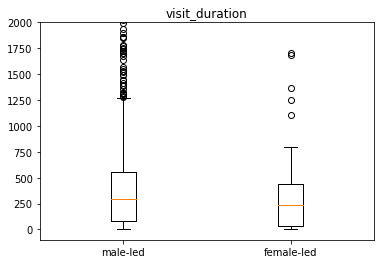

In [275]:
plot('visit_duration')
plt.axis([None, None, -100, 2000]);

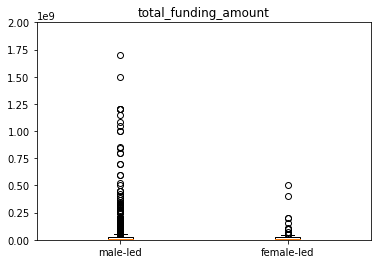

In [134]:
plot('total_funding_amount')
plt.axis([None, None, -100, .2*1e10]);

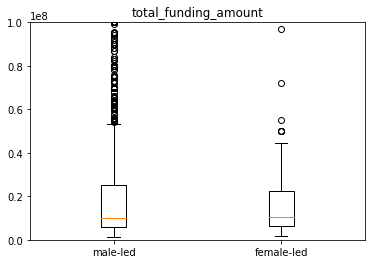

In [135]:
plot('total_funding_amount')
plt.axis([None, None, -100, 1e8]);

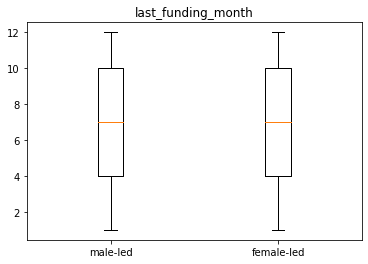

In [136]:
# how does it help prediction??? what plot should i use instead?
plot('last_funding_month')

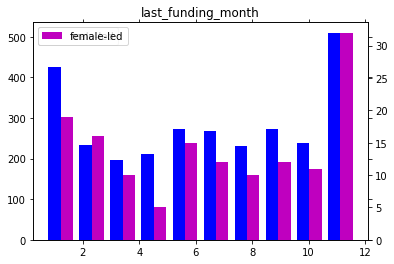

In [191]:
plot('last_funding_month', type='hist')

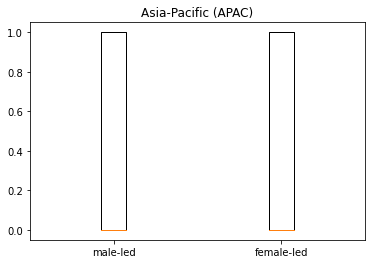

In [205]:
# for bool/categorical use barplot?
plot('Asia-Pacific (APAC)', null=True)

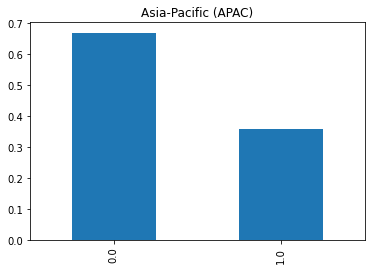

In [225]:
plot('Asia-Pacific (APAC)', null=True, type='bar')

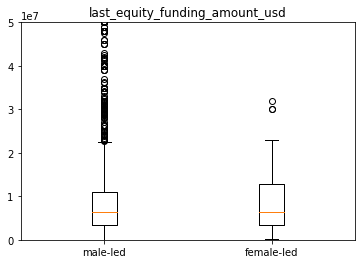

In [228]:
plot('last_equity_funding_amount_usd')
plt.axis([None, None, -100, 0.5*1e8]);

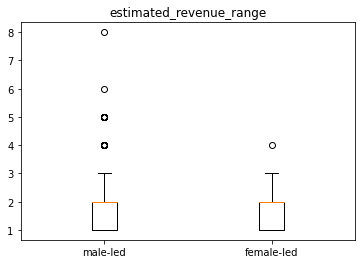

In [229]:
plot('estimated_revenue_range')

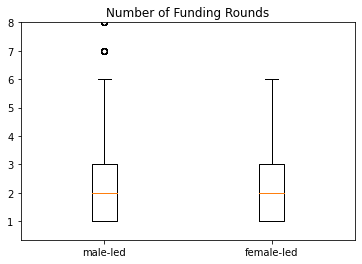

In [231]:
plot('Number of Funding Rounds')
plt.axis([None, None, None, 8]);

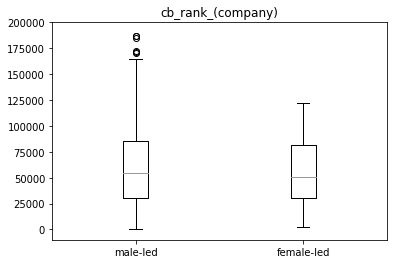

In [239]:
plot('cb_rank_(company)')
plt.axis([None, None, -10000, .2*1e6]);

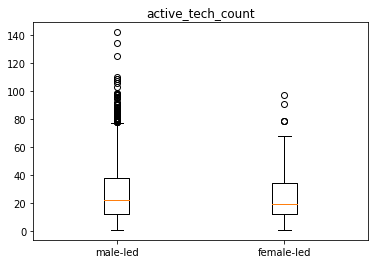

In [241]:
plot('active_tech_count')

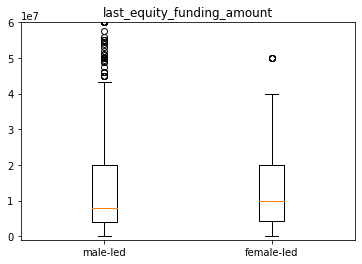

In [251]:
plot('last_equity_funding_amount')
plt.axis([None, None, -1e6, .6*1e8]);

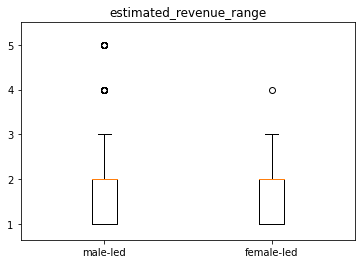

In [257]:
plot('estimated_revenue_range')
plt.axis([None, None, None, 5.5]);

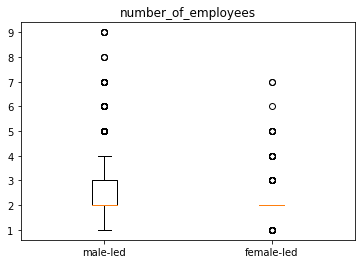

In [256]:
plot('number_of_employees')
# plt.axis([None, None, None, 5.5]);

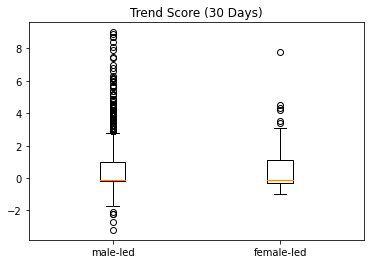

In [258]:
plot('Trend Score (30 Days)')

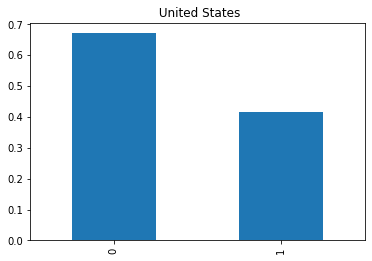

In [261]:
plot(' United States', type='bar')
# plt.axis([None, None, None, 5.5]);

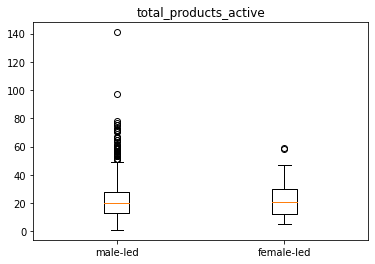

In [264]:
plot('total_products_active')

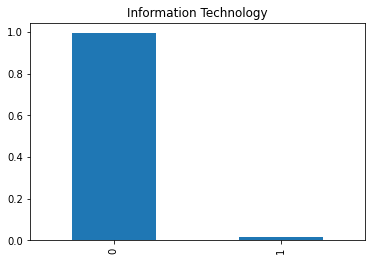

In [265]:
plot('Information Technology', type='bar')

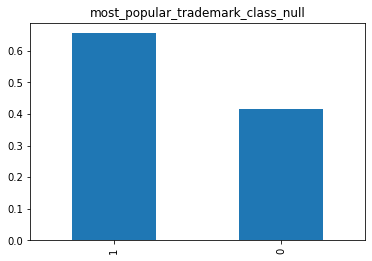

In [267]:
plot('most_popular_trademark_class_null', type='bar')

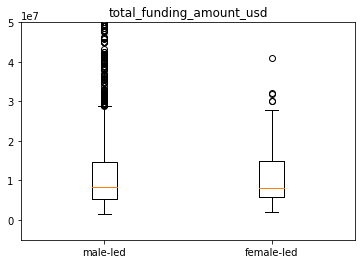

In [273]:
plot('total_funding_amount_usd')
plt.axis([None, None, .5*-1e7, .5*1e8]);

In [120]:
df_sort[df_sort[0]==11]

,0
Number of Founders,11
visit_duration,11
total_funding_amount,11
last_funding_month,11
Asia-Pacific (APAC),11
last_equity_funding_amount_usd,11
estimated_revenue_range,11
Number of Funding Rounds,11
cb_rank_(company),11
active_tech_count,11


In [ ]:
col = 'Asia-Pacific (APAC)'

# set up
labels = ['male-led', 'female-led']
male_filter = (data['female_led']==0)
female_filter = (data['female_led']==1)
remove_null_filter = (data[col]!=0)

# get data
male_df = data[male_filter & remove_null_filter][col]
female_df = data[female_filter  & remove_null_filter][col]
male_null = data[male_filter][col]
female_null = data[female_filter][col]